In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.axis('off')
  plt.show()

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell.finetune/', '')
  
import sys, os, math
import gezi, melt
import numpy as np

from deepiu.util import algos_factory
from deepiu.seq2seq.rnn_decoder import SeqDecodeMethod

#debug
from deepiu.util import text2ids

TEXT_MAX_WORDS = 100    
decode_max_words = 20


from deepiu.util import ids2text
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
ids2text.init(vocab_path)

image_dir = image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)
image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'
image_model_name='InceptionResnetV2'
FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model/showandtell.finetune'

if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      model_name=image_model_name)
else:
  image_model = None
print('image_model', image_model)

tensorflow_version: 1.3.0


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words
image_model None


ENCODE_UNK 1


In [2]:
FLAGS.image_encoder = 'ShowAndTell'
#FLAGS.showtell_encode_scope = 'encode'  #in model.v3 will use encode and decode scope
#FLAGS.showtell_decode_scope = 'decode'
FLAGS.image_attention_size = 64 
FLAGS.image_endpoint_feature_name = None
FLAGS.image_model = 'InceptionResnetV2'
FLAGS.image_checkpoint_file = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt' 
FLAGS.pre_calc_image_feature = False
FLAGS.emb_dim = 512 
FLAGS.rnn_hidden_size = 512 
FLAGS.image_feature_len = 1536
FLAGS.alignment_history = True

beam_size = 10
length_normalization_factor = 0.25

In [3]:
algo = 'show_and_tell'
global_scope = algo
main_scope = 'main'
melt.apps.image_processing.init()
with tf.variable_scope(global_scope):
  with tf.variable_scope(main_scope):
    predictor =  algos_factory.gen_predictor(algo)
    predictor.init_predict_text(decode_method=SeqDecodeMethod.ingraph_beam, 
                                beam_size=beam_size,
                                length_normalization_factor=length_normalization_factor,
                                logprobs_history=True)  

predictor.load(FLAGS.model_dir) 

attention_option: luong
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


cell: <class 'tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell'>
rnn decoder gen only mode
image_model feature_name is None will get PreLogits
image_feature: Tensor("show_and_tell/main/main/InceptionResnetV2/Logits/Dropout/Identity:0", shape=(?, 1536), dtype=float32)


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell.finetune/model.ckpt-21.61-709000


restore ok: /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell.finetune/model.ckpt-21.61-709000
load model ok /home/gezi/new/temp/image-caption/ai-challenger/model/showandtell.finetune/model.ckpt-21.61-709000 duration: 47.2509651184


In [4]:
def predict(image_path, predictor):
  timer = gezi.Timer('beam search using time')
  img = melt.read_image(image_path)
  if image_model:
    feature = image_model.gen_feature(img) if image_model is not None else img
  else:
    feature = [img]    

  logprobs_history = None 

  l = predictor.predict_text(feature)
  timer.print()
  texts_list, scores_list= l[0], l[1]
  try:
    logprobs_history = l[2]
  except Exception:
    pass

  #print(alignment_history)

  texts = texts_list[0]
  scores = scores_list[0]
  if logprobs_history is not None:
    logprobs = logprobs_history[0]
  else:
    logprobs = [None] * len(texts)

  logprob = None 
  alignment = None 
    
  for i, (text, score, logprob) in enumerate(zip(texts, scores, logprobs)):
    print(i, ids2text.ids2text(text), score, 'len_text:', len(text))
    #print(text, len(text))
    if logprob is not None:
      #print(map(math.exp, logprob))
      print('|'.join(['%s %.2f'%(ids2text.vocab.key(int(t)), math.exp(logp)) for t, logp in zip(text, logprob)]))

In [ ]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 743e12038dcf7dbc68123ca7dff9d6d66eb09ea1


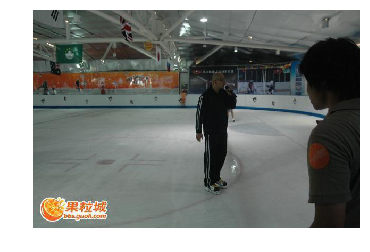

beam search using time duration: 1.22400808334


0 一个 戴着 帽子 的 人 和 一个 穿着 黑色 衣服 的 人 在 滑冰场 上 滑冰 </S> 0.00772438 len_text: 30
一个 0.17|戴着 0.19|帽子 0.69|的 0.99|人 0.48|和 0.46|一个 0.87|穿着 0.44|黑色 0.51|衣服 0.44|的 1.00|人 0.78|在 0.57|滑冰场 0.46|上 0.85|滑冰 0.72|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
1 宽敞 的 大厅 里 有 两个 戴着 帽子 的 人 在 滑冰 </S> 0.00764332 len_text: 30
宽敞 0.17|的 1.00|大厅 0.23|里 0.97|有 0.49|两个 0.36|戴着 0.16|帽子 0.59|的 0.99|人 0.88|在 0.79|滑冰 0.22|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
2 宽敞 的 大厅 里 有 两个 穿着 黑色 衣服 的 人 在 滑冰 </S> 0.00646016 len_text: 30
宽敞 0.17|的 1.00|大厅 0.23|里 0.97|有 0.49|两个 0.36|穿着 0.41|黑色 0.27|衣服 0.45|的 0.99|人 0.88|在 0.89|滑冰 0.24|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|

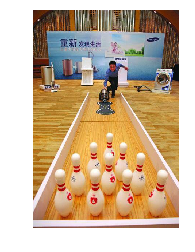

beam search using time duration: 1.63289999962


0 大厅 里 有 一个 穿着 黑色 衣服 的 女人 在 打 保龄球 </S> 0.00374044 len_text: 30
大厅 0.09|里 0.96|有 0.35|一个 0.80|穿着 0.29|黑色 0.63|衣服 0.41|的 0.99|女人 0.42|在 0.65|打 0.06|保龄球 0.79|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
1 房间 里 有 一个 穿着 黑色 衣服 的 女人 在 玩 玩具 </S> 0.00201873 len_text: 30
房间 0.06|里 0.99|有 0.44|一个 0.83|穿着 0.27|黑色 0.62|衣服 0.37|的 0.99|女人 0.36|在 0.62|玩 0.10|玩具 0.26|</S> 0.91|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
2 大厅 里 有 一个 穿着 黑色 衣服 的 女人 在 玩 保龄球 </S> 0.00200339 len_text: 30
大厅 0.09|里 0.96|有 0.35|一个 0.80|穿着 0.29|黑色 0.63|衣服 0.41|的 0.99|女人 0.42|在 0.65|玩 0.07|保龄球 0.23|</S> 0.98|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<

In [ ]:
while True:
  image_name = raw_input('image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name) if not os.path.exists(image_name) else image_name

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
        continue
  plt.subplot(1, 1, 1)
  image_show(image_path)
  predict(image_path, predictor)
  #predict(image_path, predictor2, gen_feature=False)

In [ ]:
import glob 
for img in glob.glob('/home/gezi/new2/data/ai_challenger/image_caption/test_pic/*.jpg'):
    image_show(img)
    predict(img, predictor)